In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
from patsy import dmatrices
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import scipy.stats as stats
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [3]:
features = pd.read_csv('C:/Users/Lenovo/Downloads/CaseStudy/2. Walmart Store Sales Forecasting/data/features.csv')
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [4]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [5]:
stores = pd.read_csv('C:/Users/Lenovo/Downloads/CaseStudy/2. Walmart Store Sales Forecasting/data/stores.csv')
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [6]:
train = pd.read_csv('C:/Users/Lenovo/Downloads/CaseStudy/2. Walmart Store Sales Forecasting/data/train.csv')
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [8]:
stores.Store.value_counts().tail()

28    1
27    1
26    1
25    1
1     1
Name: Store, dtype: int64

In [9]:
train.shape

(421570, 5)

In [10]:
stores.shape

(45, 3)

In [11]:
features.shape

(8190, 12)

In [12]:
t_s=pd.merge(left =train,right = stores,left_on='Store',right_on ='Store')
t_s.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size
0,1,1,2010-02-05,24924.50,False,A,151315
1,1,1,2010-02-12,46039.49,True,A,151315
2,1,1,2010-02-19,41595.55,False,A,151315
3,1,1,2010-02-26,19403.54,False,A,151315
4,1,1,2010-03-05,21827.90,False,A,151315


In [13]:
t_s['s_d'] = t_s['Store'].astype('str') + '_' + t_s['Date'].astype('str')

In [14]:
t_s.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,s_d
0,1,1,2010-02-05,24924.50,False,A,151315,1_2010-02-05
1,1,1,2010-02-12,46039.49,True,A,151315,1_2010-02-12
2,1,1,2010-02-19,41595.55,False,A,151315,1_2010-02-19
3,1,1,2010-02-26,19403.54,False,A,151315,1_2010-02-26
4,1,1,2010-03-05,21827.90,False,A,151315,1_2010-03-05


In [15]:
features['s_d']=features['Store'].astype('str')+ '_' + features['Date'].astype('str')

In [16]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,s_d
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,1_2010-02-05
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,1_2010-02-12
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,1_2010-02-19
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,1_2010-02-26
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,1_2010-03-05


In [17]:
df = pd.merge(left = features, right = t_s ,left_on ='s_d',right_on ='s_d')
df.head()

,Store_x,Date_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_x,s_d,Store_y,Dept,Date_y,Weekly_Sales,IsHoliday_y,Type,Size
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,1_2010-02-05,1,1,2010-02-05,24924.50,False,A,151315
1,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,1_2010-02-05,1,2,2010-02-05,50605.27,False,A,151315
2,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,1_2010-02-05,1,3,2010-02-05,13740.12,False,A,151315
3,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,1_2010-02-05,1,4,2010-02-05,39954.04,False,A,151315
4,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,1_2010-02-05,1,5,2010-02-05,32229.38,False,A,151315


In [18]:
df['id'] = df['Store_x'].astype('str') + '_' +df['Dept'].astype('str') + '_' +df['Date_x'].astype('str')

In [19]:
df.head()

,Store_x,Date_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,...,IsHoliday_x,s_d,Store_y,Dept,Date_y,Weekly_Sales,IsHoliday_y,Type,Size,id
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,...,False,1_2010-02-05,1,1,2010-02-05,24924.50,False,A,151315,1_1_2010-02-05
1,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,...,False,1_2010-02-05,1,2,2010-02-05,50605.27,False,A,151315,1_2_2010-02-05
2,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,...,False,1_2010-02-05,1,3,2010-02-05,13740.12,False,A,151315,1_3_2010-02-05
3,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,...,False,1_2010-02-05,1,4,2010-02-05,39954.04,False,A,151315,1_4_2010-02-05
4,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,...,False,1_2010-02-05,1,5,2010-02-05,32229.38,False,A,151315,1_5_2010-02-05


In [20]:
df.drop(['s_d','Store_y','Date_y','IsHoliday_y'],axis=1,inplace=True)

In [21]:
df.rename({'Store_x':'Store','Date_x':'Date','IsHoliday_x':'IsHoliday'},axis=1,inplace=True)

In [22]:
df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size,id
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,1,24924.50,A,151315,1_1_2010-02-05
1,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,2,50605.27,A,151315,1_2_2010-02-05
2,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,3,13740.12,A,151315,1_3_2010-02-05
3,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,4,39954.04,A,151315,1_4_2010-02-05
4,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,5,32229.38,A,151315,1_5_2010-02-05


In [23]:
df['Date']=pd.to_datetime(df.Date).copy()

### Checking whether holidays are not marked as false as mentioned in the que..

In [24]:
holidays =['12-Feb-10', '11-Feb-11', '10-Feb-12', '8-Feb-13','10-Sep-10','9-Sep-11','7-Sep-12','6-Sep-13','26-Nov-10','25-Nov-11','23-Nov-12','29-Nov-13',
            '31-Dec-10','30-Dec-11','28-Dec-12','27-Dec-13']

In [25]:
df.loc[(df['Date'].isin(holidays)) & (df['IsHoliday'] == False)]

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size,id


In [26]:
def continuous_var_summary(x):
    return pd.Series([x.dtype, x.nunique(), x.count(), x.isnull().sum(), x.sum(), x.mean(),
                      x.median(), x.std(), x.var(), x.min(), x.quantile(0.01), x.quantile(0.05),
                          x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), 
                              x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
            index = ['DataType', 'C', 'N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 
                           'P1', 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

In [27]:
df[df.columns.difference(['Date','id','Type'])].apply(continuous_var_summary).T

,DataType,C,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
CPI,float64,2145,421570,0,7.21736e+07,171.202,182.319,39.1593,1533.45,126.064,126.112,126.496,128.824,132.023,182.319,212.417,219.444,221.942,225.474,227.233
Dept,int64,81,421570,0,18658822,44.2603,37,30.4921,929.765,1,1,4,7,18,37,74,92,95,98,99
Fuel_Price,float64,892,421570,0,1.41691e+06,3.36103,3.452,0.458515,0.210236,2.472,2.565,2.653,2.72,2.933,3.452,3.738,3.917,4.029,4.202,4.468
IsHoliday,bool,2,421570,0,29661,0.0703584,0,0.25575,0.0654083,False,0,0,0,0,0,0,0,1,1,True
MarkDown1,float64,2277,150681,270889,1.0919e+09,7246.42,5347.45,8291.22,6.87444e+07,0.27,17.76,149.19,375.2,2240.27,5347.45,9210.9,15282.5,21801.3,41524,88646.8
MarkDown2,float64,1499,111248,310322,3.70971e+08,3334.63,192,9475.36,8.97824e+07,-265.76,-0.99,1.95,6.98,41.6,192,1926.94,8549.74,16497.5,50366.6,104520
MarkDown3,float64,1662,137091,284479,1.97332e+08,1439.42,24.6,9623.08,9.26036e+07,-29.1,0.06,0.65,1.65,5.08,24.6,103.99,400.09,1059.9,63143.3,141631
MarkDown4,float64,1944,134967,286603,4.56616e+08,3383.17,1481.31,6292.38,3.95941e+07,0.22,3.97,28.76,108.71,504.22,1481.31,3595.04,7871.42,12646,35785.3,67474.9
MarkDown5,float64,2293,151432,270138,7.00975e+08,4628.98,3359.45,5962.89,3.5556e+07,135.16,351.97,715.52,1070.83,1878.44,3359.45,5563.8,8337.7,11269.2,27754.2,108519
Size,int64,40,421570,0,57640387438,136728,140167,60980.6,3.71863e+09,34875,34875,39690,39910,93638,140167,202505,204184,206302,219622,219622


In [28]:
cat_var =df.loc[:,['Type','Dept','IsHoliday']]

In [29]:
cat_var = cat_var.astype('category').copy()

In [30]:
cat_var_d = pd.get_dummies(cat_var,drop_first=True)

In [31]:
cat_var_d.shape

(421570, 83)

In [32]:
num_var = df[df.columns.difference(['Type','Dept','IsHoliday','id'])]

In [33]:
num_var = num_var.apply(lambda x: x.clip(lower = x.quantile(0.01), 
                                                         upper = x.quantile(0.99)))

In [34]:
num_var.shape

(421570, 13)

In [35]:
df2 = pd.concat([num_var,cat_var_d],axis=1)

In [36]:
df2.head()

,CPI,Date,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Size,Store,...,Dept_91,Dept_92,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99,IsHoliday_True
0,211.096358,2010-02-12,2.572,NaN,NaN,NaN,NaN,NaN,151315,1,...,0,0,0,0,0,0,0,0,0,0
1,211.096358,2010-02-12,2.572,NaN,NaN,NaN,NaN,NaN,151315,1,...,0,0,0,0,0,0,0,0,0,0
2,211.096358,2010-02-12,2.572,NaN,NaN,NaN,NaN,NaN,151315,1,...,0,0,0,0,0,0,0,0,0,0
3,211.096358,2010-02-12,2.572,NaN,NaN,NaN,NaN,NaN,151315,1,...,0,0,0,0,0,0,0,0,0,0
4,211.096358,2010-02-12,2.572,NaN,NaN,NaN,NaN,NaN,151315,1,...,0,0,0,0,0,0,0,0,0,0


In [37]:
df2.dropna(inplace=True)

In [38]:
df2.shape

(97056, 96)

In [39]:
df2

,CPI,Date,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Size,Store,...,Dept_91,Dept_92,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99,IsHoliday_True
6587,217.998085,2011-11-11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,151315,1,...,0,0,0,0,0,0,0,0,0,0
6588,217.998085,2011-11-11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,151315,1,...,0,0,0,0,0,0,0,0,0,0
6589,217.998085,2011-11-11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,151315,1,...,0,0,0,0,0,0,0,0,0,0
6590,217.998085,2011-11-11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,151315,1,...,0,0,0,0,0,0,0,0,0,0
6591,217.998085,2011-11-11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,151315,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,192.308899,2012-10-19,3.882,4018.91,58.08,100.00,211.94,858.33,118221,45,...,0,0,1,0,0,0,0,0,0,0
421566,192.308899,2012-10-19,3.882,4018.91,58.08,100.00,211.94,858.33,118221,45,...,0,0,0,1,0,0,0,0,0,0
421567,192.308899,2012-10-19,3.882,4018.91,58.08,100.00,211.94,858.33,118221,45,...,0,0,0,0,1,0,0,0,0,0
421568,192.308899,2012-10-19,3.882,4018.91,58.08,100.00,211.94,858.33,118221,45,...,0,0,0,0,0,0,1,0,0,0


In [40]:
df2['Weekly_Sales'].isna().any()

False

In [43]:
import datetime as dt

In [44]:
df2['Date'] = df2['Date'].map(dt.datetime.toordinal)

In [45]:
sc = StandardScaler()
scaled_df=sc.fit_transform(df2[df2.columns.difference(['Weekly_Sales'])])

In [46]:
scaled = pd.DataFrame(scaled_df)
scaled.columns = df2[df2.columns.difference(['Weekly_Sales'])].columns

In [47]:
scaled.head()

,CPI,Date,Dept_10,Dept_11,Dept_12,Dept_13,Dept_14,Dept_16,Dept_17,Dept_18,...,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Size,Store,Temperature,Type_B,Type_C,Unemployment
0,1.090918,-1.555761,-0.120759,-0.120759,-0.120759,-0.120759,-0.120759,-0.120759,-0.120759,-0.111414,...,0.309168,-0.152347,-0.23501,0.329867,-0.07645,-1.598238,0.09617,-0.810317,-0.09538,0.26397
1,1.090918,-1.555761,-0.120759,-0.120759,-0.120759,-0.120759,-0.120759,-0.120759,-0.120759,-0.111414,...,0.309168,-0.152347,-0.23501,0.329867,-0.07645,-1.598238,0.09617,-0.810317,-0.09538,0.26397
2,1.090918,-1.555761,-0.120759,-0.120759,-0.120759,-0.120759,-0.120759,-0.120759,-0.120759,-0.111414,...,0.309168,-0.152347,-0.23501,0.329867,-0.07645,-1.598238,0.09617,-0.810317,-0.09538,0.26397
3,1.090918,-1.555761,-0.120759,-0.120759,-0.120759,-0.120759,-0.120759,-0.120759,-0.120759,-0.111414,...,0.309168,-0.152347,-0.23501,0.329867,-0.07645,-1.598238,0.09617,-0.810317,-0.09538,0.26397
4,1.090918,-1.555761,-0.120759,-0.120759,-0.120759,-0.120759,-0.120759,-0.120759,-0.120759,-0.111414,...,0.309168,-0.152347,-0.23501,0.329867,-0.07645,-1.598238,0.09617,-0.810317,-0.09538,0.26397


In [48]:
scaled.shape

(97056, 95)

In [50]:
scaled.columns

Index(['CPI', 'Date', 'Dept_10', 'Dept_11', 'Dept_12', 'Dept_13', 'Dept_14',
       'Dept_16', 'Dept_17', 'Dept_18', 'Dept_19', 'Dept_2', 'Dept_20',
       'Dept_21', 'Dept_22', 'Dept_23', 'Dept_24', 'Dept_25', 'Dept_26',
       'Dept_27', 'Dept_28', 'Dept_29', 'Dept_3', 'Dept_30', 'Dept_31',
       'Dept_32', 'Dept_33', 'Dept_34', 'Dept_35', 'Dept_36', 'Dept_37',
       'Dept_38', 'Dept_39', 'Dept_4', 'Dept_40', 'Dept_41', 'Dept_42',
       'Dept_43', 'Dept_44', 'Dept_45', 'Dept_46', 'Dept_47', 'Dept_48',
       'Dept_49', 'Dept_5', 'Dept_50', 'Dept_51', 'Dept_52', 'Dept_54',
       'Dept_55', 'Dept_56', 'Dept_58', 'Dept_59', 'Dept_6', 'Dept_60',
       'Dept_65', 'Dept_67', 'Dept_7', 'Dept_71', 'Dept_72', 'Dept_74',
       'Dept_77', 'Dept_78', 'Dept_79', 'Dept_8', 'Dept_80', 'Dept_81',
       'Dept_82', 'Dept_83', 'Dept_85', 'Dept_87', 'Dept_9', 'Dept_90',
       'Dept_91', 'Dept_92', 'Dept_93', 'Dept_94', 'Dept_95', 'Dept_96',
       'Dept_97', 'Dept_98', 'Dept_99', 'Fuel_Price', '

In [51]:
scaled['sales'] = df2['Weekly_Sales'].values

## Assumption Check

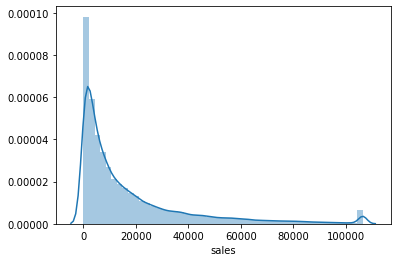

In [52]:
sns.distplot(scaled.sales)

In [53]:
scaled.sales.skew()

2.0591186383409847

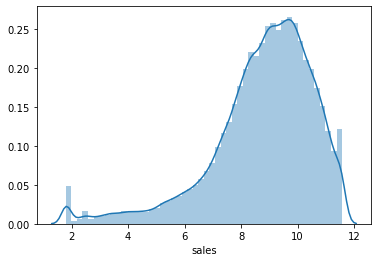

In [54]:
sns.distplot(np.log(scaled['sales'] +1))

In [55]:
np.log(scaled.sales +1).skew()

-1.2733242314966478

In [56]:
scaled['ln_sales'] = np.log(scaled['sales'] +1)

In [57]:
train,test = train_test_split(scaled,test_size=0.3,random_state=123)

In [58]:
train.shape

(67939, 97)

In [59]:
test.shape

(29117, 97)

In [60]:
features = scaled.columns.difference(['sales','ln_sales'])
features

Index(['CPI', 'Date', 'Dept_10', 'Dept_11', 'Dept_12', 'Dept_13', 'Dept_14',
       'Dept_16', 'Dept_17', 'Dept_18', 'Dept_19', 'Dept_2', 'Dept_20',
       'Dept_21', 'Dept_22', 'Dept_23', 'Dept_24', 'Dept_25', 'Dept_26',
       'Dept_27', 'Dept_28', 'Dept_29', 'Dept_3', 'Dept_30', 'Dept_31',
       'Dept_32', 'Dept_33', 'Dept_34', 'Dept_35', 'Dept_36', 'Dept_37',
       'Dept_38', 'Dept_39', 'Dept_4', 'Dept_40', 'Dept_41', 'Dept_42',
       'Dept_43', 'Dept_44', 'Dept_45', 'Dept_46', 'Dept_47', 'Dept_48',
       'Dept_49', 'Dept_5', 'Dept_50', 'Dept_51', 'Dept_52', 'Dept_54',
       'Dept_55', 'Dept_56', 'Dept_58', 'Dept_59', 'Dept_6', 'Dept_60',
       'Dept_65', 'Dept_67', 'Dept_7', 'Dept_71', 'Dept_72', 'Dept_74',
       'Dept_77', 'Dept_78', 'Dept_79', 'Dept_8', 'Dept_80', 'Dept_81',
       'Dept_82', 'Dept_83', 'Dept_85', 'Dept_87', 'Dept_9', 'Dept_90',
       'Dept_91', 'Dept_92', 'Dept_93', 'Dept_94', 'Dept_95', 'Dept_96',
       'Dept_97', 'Dept_98', 'Dept_99', 'Fuel_Price', '

In [61]:
model_param ='ln_sales ~ ' + (' + ').join(features)

In [62]:
model_param

'ln_sales ~ CPI + Date + Dept_10 + Dept_11 + Dept_12 + Dept_13 + Dept_14 + Dept_16 + Dept_17 + Dept_18 + Dept_19 + Dept_2 + Dept_20 + Dept_21 + Dept_22 + Dept_23 + Dept_24 + Dept_25 + Dept_26 + Dept_27 + Dept_28 + Dept_29 + Dept_3 + Dept_30 + Dept_31 + Dept_32 + Dept_33 + Dept_34 + Dept_35 + Dept_36 + Dept_37 + Dept_38 + Dept_39 + Dept_4 + Dept_40 + Dept_41 + Dept_42 + Dept_43 + Dept_44 + Dept_45 + Dept_46 + Dept_47 + Dept_48 + Dept_49 + Dept_5 + Dept_50 + Dept_51 + Dept_52 + Dept_54 + Dept_55 + Dept_56 + Dept_58 + Dept_59 + Dept_6 + Dept_60 + Dept_65 + Dept_67 + Dept_7 + Dept_71 + Dept_72 + Dept_74 + Dept_77 + Dept_78 + Dept_79 + Dept_8 + Dept_80 + Dept_81 + Dept_82 + Dept_83 + Dept_85 + Dept_87 + Dept_9 + Dept_90 + Dept_91 + Dept_92 + Dept_93 + Dept_94 + Dept_95 + Dept_96 + Dept_97 + Dept_98 + Dept_99 + Fuel_Price + IsHoliday_True + MarkDown1 + MarkDown2 + MarkDown3 + MarkDown4 + MarkDown5 + Size + Store + Temperature + Type_B + Type_C + Unemployment'

In [63]:
f_val,p_val = f_regression(scaled[features],scaled['ln_sales'])

In [64]:
f_reg = pd.DataFrame({'f_val':f_val,'p_val':p_val})

In [65]:
f_reg['cols'] = scaled.columns.difference(['sales','ln_sales'])

In [66]:
f_reg.head()

,f_val,p_val,cols
0,30.996940,2.591166e-08,CPI
1,27.884215,1.290727e-07,Date
2,523.312735,1.630225e-115,Dept_10
3,332.146991,4.355624e-74,Dept_11
4,73.038665,1.289410e-17,Dept_12


In [67]:
f_reg.shape

(95, 3)

In [68]:
imp_var = f_reg.loc[f_reg['p_val'] <0.05,'cols'].to_list()

In [69]:
len(imp_var)

90

In [70]:
model_param ='ln_sales ~ ' + (' + ').join(imp_var)
model_param

'ln_sales ~ CPI + Date + Dept_10 + Dept_11 + Dept_12 + Dept_13 + Dept_14 + Dept_16 + Dept_17 + Dept_18 + Dept_19 + Dept_2 + Dept_20 + Dept_21 + Dept_22 + Dept_23 + Dept_24 + Dept_25 + Dept_27 + Dept_28 + Dept_29 + Dept_3 + Dept_30 + Dept_31 + Dept_33 + Dept_34 + Dept_35 + Dept_36 + Dept_37 + Dept_38 + Dept_39 + Dept_4 + Dept_40 + Dept_41 + Dept_42 + Dept_43 + Dept_44 + Dept_45 + Dept_46 + Dept_47 + Dept_48 + Dept_49 + Dept_5 + Dept_50 + Dept_51 + Dept_52 + Dept_54 + Dept_55 + Dept_56 + Dept_58 + Dept_59 + Dept_6 + Dept_60 + Dept_65 + Dept_67 + Dept_7 + Dept_71 + Dept_72 + Dept_74 + Dept_77 + Dept_78 + Dept_79 + Dept_8 + Dept_80 + Dept_81 + Dept_82 + Dept_83 + Dept_85 + Dept_87 + Dept_9 + Dept_90 + Dept_91 + Dept_92 + Dept_93 + Dept_94 + Dept_95 + Dept_97 + Dept_98 + Dept_99 + MarkDown1 + MarkDown2 + MarkDown3 + MarkDown4 + MarkDown5 + Size + Store + Temperature + Type_B + Type_C + Unemployment'

In [71]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

y, X = dmatrices(model_param, scaled, return_type = 'dataframe')
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['vif_factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif.sort_values(by=['vif_factor'],ascending=False).reset_index()

,index,Features,vif_factor
0,85,Size,4.458807
1,88,Type_B,4.062232
2,80,MarkDown1,3.037388
3,83,MarkDown4,2.922981
4,2,Date,2.892693
...,...,...,...
86,54,Dept_65,1.009781
87,61,Dept_78,1.007385
88,36,Dept_43,1.001093
89,31,Dept_39,1.000863


In [72]:
trainx,testx,trainy,testy= train_test_split(scaled[imp_var],scaled['ln_sales'],test_size=0.3,random_state=123)

In [73]:
rfe=RFE(LinearRegression(),30)
rfe.fit(trainx,trainy)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=30 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


RFE(estimator=LinearRegression(), n_features_to_select=30)

In [74]:
rfe.ranking_

array([34, 32, 30, 39, 13,  6, 38, 61, 51,  1,  1,  1, 19, 18, 52, 26, 20,
       60,  1,  1, 17, 48,  8,  1, 21, 46,  1,  1,  9,  1, 44, 23,  1,  1,
       22, 37, 14,  1, 27,  1,  2,  1, 29, 12,  1,  1,  1, 59,  1,  1,  1,
       10,  1, 47, 55, 25, 16,  1, 42,  4,  5, 28,  7, 11, 43, 35,  1,  1,
       40, 31,  3, 24,  1, 49, 54,  1, 50,  1,  1, 56, 53, 41, 57, 45,  1,
       15, 58,  1, 33, 36])

In [163]:
trainx.columns

Index(['CPI', 'Date', 'Dept_10', 'Dept_11', 'Dept_12', 'Dept_13', 'Dept_14',
       'Dept_16', 'Dept_17', 'Dept_18', 'Dept_19', 'Dept_2', 'Dept_20',
       'Dept_21', 'Dept_22', 'Dept_23', 'Dept_24', 'Dept_25', 'Dept_27',
       'Dept_28', 'Dept_29', 'Dept_3', 'Dept_30', 'Dept_31', 'Dept_33',
       'Dept_34', 'Dept_35', 'Dept_36', 'Dept_37', 'Dept_38', 'Dept_39',
       'Dept_4', 'Dept_40', 'Dept_41', 'Dept_42', 'Dept_43', 'Dept_44',
       'Dept_45', 'Dept_46', 'Dept_47', 'Dept_48', 'Dept_49', 'Dept_5',
       'Dept_50', 'Dept_51', 'Dept_52', 'Dept_54', 'Dept_55', 'Dept_56',
       'Dept_58', 'Dept_59', 'Dept_6', 'Dept_60', 'Dept_65', 'Dept_67',
       'Dept_7', 'Dept_71', 'Dept_72', 'Dept_74', 'Dept_77', 'Dept_78',
       'Dept_79', 'Dept_8', 'Dept_80', 'Dept_81', 'Dept_82', 'Dept_83',
       'Dept_85', 'Dept_87', 'Dept_9', 'Dept_90', 'Dept_91', 'Dept_92',
       'Dept_93', 'Dept_94', 'Dept_95', 'Dept_97', 'Dept_98', 'Dept_99',
       'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown

In [75]:
rfe.score(trainx,trainy)

0.6143932762774751

In [76]:
var_df = pd.DataFrame({'cols':trainx.columns,'rank':pd.Series(rfe.ranking_)})

In [167]:
var= var_df.loc[var_df['rank'] == 1,'cols'].to_list()

In [168]:
var.append('Date')

In [170]:
model_param = 'ln_sales ~ ' + ' + '.join(var)

In [171]:
ln = smf.ols(model_param,train).fit()

In [172]:
ln.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_sales   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     3502.
Date:                Thu, 26 Nov 2020   Prob (F-statistic):               0.00
Time:                        13:26:35   Log-Likelihood:            -1.0590e+05
No. Observations:               67939   AIC:                         2.119e+05
Df Residuals:                   67907   BIC:                         2.122e+05
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.7568      0.004   1984.017      0.000       8.748       8.765
Dept_18       -0.2284      0.004    -51.774      0.000      -0.237      -0.220
Dept_19       -0.2631      0.004    -58.501      0.000      -0.272      -0.254
Dept_2         0.1813      0.004     40.538      0.000       0.173       0.190
Dept_27       -0.2274      0.004    -51.290      0.000      -0.236      -0.219
Dept_28       -0.3488      0.004    -78.002      0.000      -0.358      -0.340
Dept_31       -0.1847      0.004    -41.448      0.000      -0.193      -0.176
Dept_35       -0.1762      0.004    -40.110      0.000      -0.185      -0.168
Dept_36       -0.2434      0.004    -55.324      0.000      -0.252      -0.235
Dept_38        0.2156      0.004     48.046      0.000       0.207       0.224
Dept_40        0.1895      0.004     42.872      0.000       0.181       0.198
Dept_41       -0.2520      0.004    -57.376      0.000      -0.261      -0.243
Dept_45       -0.3719      0.004    -86.361      0.000      -0.380      -0.363
Dept_47       -0.2634      0.004    -59.660      0.000      -0.272      -0.255
Dept_49       -0.1949      0.004    -44.292      0.000      -0.204      -0.186
Dept_51       -0.1856      0.004    -42.089      0.000      -0.194      -0.177
Dept_52       -0.2034      0.005    -45.188      0.000      -0.212      -0.195
Dept_54       -0.6232      0.004   -142.767      0.000      -0.632      -0.615
Dept_56       -0.2237      0.004    -50.998      0.000      -0.232      -0.215
Dept_58       -0.1683      0.004    -38.048      0.000      -0.177      -0.160
Dept_59       -0.4206      0.004    -95.446      0.000      -0.429      -0.412
Dept_60       -0.4408      0.004    -98.674      0.000      -0.450      -0.432
Dept_72        0.1796      0.004     40.097      0.000       0.171       0.188
Dept_83       -0.1859      0.004    -41.578      0.000      -0.195      -0.177
Dept_85       -0.1911      0.004    -43.710      0.000      -0.200      -0.182
Dept_92        0.2187      0.004     49.745      0.000       0.210       0.227
Dept_95        0.2213      0.004     50.365      0.000       0.213       0.230
Dept_98       -0.1732      0.004    -39.293      0.000      -0.182      -0.165
Dept_99       -0.3752      0.004    -85.256      0.000      -0.384      -0.367
Size           0.5858      0.008     76.311      0.000       0.571       0.601
Type_B         0.1778      0.008     23.197      0.000       0.163       0.193
Date          -0.0525      0.004    -11.877      0.000      -0.061      -0.044
==============================================================================
Omnibus:                    23342.538   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           147979.167
Skew:                          -1.511   Prob(JB):                         0.00
Ku

In [173]:
train_pred = pd.DataFrame({'actual': np.exp(trainy),'predicted': np.exp(ln.predict(trainx))})

In [174]:
train_pred

,actual,predicted
4033,1551.00,84.470430
42496,58.92,28.158895
66944,78410.28,75968.485346
46068,9103.52,15785.252195
63868,8688.47,8657.368256
...,...,...
63206,26077.11,8944.868241
61404,10452.89,10119.831281
17730,734.88,901.147349
28030,13476.56,8021.468523


In [175]:
test_pred = pd.DataFrame({'actual': np.exp(testy),'predicted': np.exp(ln.predict(testx))})

In [176]:
test_pred

,actual,predicted
52105,22794.38,10882.289431
48797,2689.08,2411.779022
25509,18.64,50.619950
96163,207.42,218.639649
87678,27192.55,11801.612989
...,...,...
57094,3426.99,1011.758423
51717,16903.99,11081.601432
13330,33482.18,15834.517786
82405,26165.72,9089.568038


In [177]:
# a) accuracy metrics (a. MAE: Mean Absolute Error)
MAE_train = mean_absolute_error(train_pred.actual, train_pred.predicted)
MAE_test = mean_absolute_error(test_pred.actual, test_pred.predicted)

# print the values of MAE for train and test
print('MAE of training data: ', MAE_train,  ' | ', 'MAE of testing data: ', MAE_test)

MAE of training data:  9242.90684546956  |  MAE of testing data:  9228.042682145697


In [178]:
MSE_train = mean_squared_error(train_pred.actual, train_pred.predicted)
MSE_test = mean_squared_error(test_pred.actual, test_pred.predicted)

# print the values of MSE for train and test
print('MSE of training data: ', MSE_train,  ' | ', 'MSE of testing data: ', MSE_test)

# print the values of RMSE for train and test
print('RMSE of training data: ', np.sqrt(MSE_train),  ' | ', 'RMSE of testing data: ', np.sqrt(MSE_test))

MSE of training data:  251394926.78091758  |  MSE of testing data:  247887906.05387682
RMSE of training data:  15855.438397626147  |  RMSE of testing data:  15744.456359426222


In [179]:
# Step 6: 
# d.1) Corelation between actual and predicted
Corr_train = stats.pearsonr(train_pred.actual, train_pred.predicted)
Corr_test = stats.pearsonr(test_pred.actual, test_pred.predicted)

# print the values of Corelation for train and test
print('Corr of training data: ', Corr_train,  ' | ', 'Corr of testing data: ', Corr_test)

Corr of training data:  (0.7285300912968237, 0.0)  |  Corr of testing data:  (0.7324867220735567, 0.0)


In [180]:
# Step 6: 
# e) accuracy metrics (d. Decile Analysis: for validation of models - Business validation)

# create the 10 groups in the data
train_pred.loc[:, 'Deciles'] = pd.qcut( train_pred['predicted'], 10, labels = False )
test_pred.loc[:, 'Deciles'] = pd.qcut( test_pred['predicted'], 10, labels = False )

# Decile Analysis for train data
Predicted_avg_train = train_pred.groupby('Deciles')[['actual','predicted']].mean().reset_index().sort_index(ascending = False)
Predicted_avg_test = test_pred.groupby('Deciles')[['actual','predicted']].mean().reset_index().sort_index(ascending = False)



In [181]:
Predicted_avg_train

,Deciles,actual,predicted
9,9,56796.721137,54692.334302
8,8,23092.397983,16349.410296
7,7,22335.401516,15180.480807
6,6,19621.822974,13220.720188
5,5,14590.052993,9279.063976
4,4,14788.714403,8428.122573
3,3,12626.563791,6663.163544
2,2,5644.612704,3194.323854
1,1,3437.210805,1677.324454
0,0,920.304157,439.104200


In [182]:
Predicted_avg_test

,Deciles,actual,predicted
9,9,57682.771580,55361.548460
8,8,23664.080072,16418.108555
7,7,21647.300457,15188.869685
6,6,19716.489627,13171.871608
5,5,14409.367732,9261.620909
4,4,14544.035071,8418.779021
3,3,12399.026607,6690.645507
2,2,5605.455839,3231.921076
1,1,3531.963532,1694.917375
0,0,929.523139,452.649247


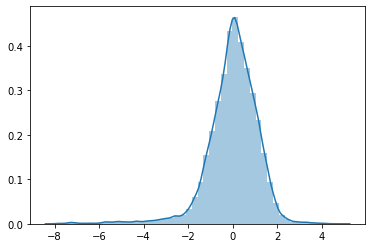

In [183]:
sns.distplot(ln.resid)
plt.show()

In [184]:
ln.resid.skew()

-1.5105759727355397

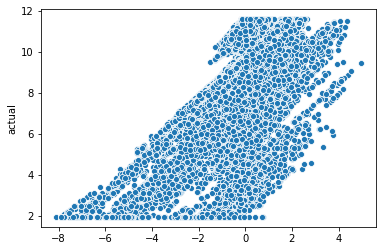

In [185]:
# assumption: homoscedasticity of residuals/errors
sns.scatterplot(ln.resid, np.log(train_pred.actual + 1))
plt.show()

In [186]:
# assumption: residuals/errors of the model should not be correlated with dependant (Y) variable
print(stats.stats.pearsonr(ln.resid, np.log(train_pred.actual + 1)))

(0.6195047187285354, 0.0)


In [230]:
model_param

'ln_sales ~ Dept_18 + Dept_19 + Dept_2 + Dept_27 + Dept_28 + Dept_31 + Dept_35 + Dept_36 + Dept_38 + Dept_40 + Dept_41 + Dept_45 + Dept_47 + Dept_49 + Dept_51 + Dept_52 + Dept_54 + Dept_56 + Dept_58 + Dept_59 + Dept_60 + Dept_72 + Dept_83 + Dept_85 + Dept_92 + Dept_95 + Dept_98 + Dept_99 + Size + Type_B + Date'

In [231]:
## Key factors are :Dept_18 + Dept_19 + Dept_2 + Dept_27 + Dept_28 + Dept_31 + Dept_35 + Dept_36 + Dept_38 + Dept_40 +
## Dept_41 + Dept_45 + Dept_47 + Dept_49 + Dept_51 + Dept_52 + Dept_54 + Dept_56 + Dept_58 + Dept_59 + Dept_60 + Dept_72 + 
## Dept_83 + Dept_85 + Dept_92 + Dept_95 + Dept_98 + Dept_99 + Size + Type_B + Date'

In [187]:
test = pd.read_csv('C:/Users/Lenovo/Downloads/CaseStudy/2. Walmart Store Sales Forecasting/data/test.csv')
test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [188]:
stores = pd.read_csv('C:/Users/Lenovo/Downloads/CaseStudy/2. Walmart Store Sales Forecasting/data/stores.csv')
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [189]:
test_stores = pd.merge(left=test,right = stores,left_on ='Store',right_on ='Store')
test_stores.head()

,Store,Dept,Date,IsHoliday,Type,Size
0,1,1,2012-11-02,False,A,151315
1,1,1,2012-11-09,False,A,151315
2,1,1,2012-11-16,False,A,151315
3,1,1,2012-11-23,True,A,151315
4,1,1,2012-11-30,False,A,151315


In [190]:
test_stores.shape

(115064, 6)

In [222]:
Id = pd.DataFrame(columns=['id'])

In [224]:
Id['id'] = test_stores['Store'].astype('str') +'_' + test_stores['Dept'].astype('str') + "_" + test_stores['Date'].astype('str')

In [225]:
Id['id'] 

0           1_1_2012-11-02
1           1_1_2012-11-09
2           1_1_2012-11-16
3           1_1_2012-11-23
4           1_1_2012-11-30
                ...       
115059    45_98_2013-06-28
115060    45_98_2013-07-05
115061    45_98_2013-07-12
115062    45_98_2013-07-19
115063    45_98_2013-07-26
Name: id, Length: 115064, dtype: object

In [192]:
test_stores['Date']=pd.to_datetime(test_stores['Date'])

In [193]:
test_stores.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115064 entries, 0 to 115063
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Store      115064 non-null  int64         
 1   Dept       115064 non-null  int64         
 2   Date       115064 non-null  datetime64[ns]
 3   IsHoliday  115064 non-null  bool          
 4   Type       115064 non-null  object        
 5   Size       115064 non-null  int64         
dtypes: bool(1), datetime64[ns](1), int64(3), object(1)
memory usage: 5.4+ MB


In [194]:
test_stores.loc[(test_stores['Date'].isin(holidays)) & (test_stores['IsHoliday'] == False)]

,Store,Dept,Date,IsHoliday,Type,Size


In [195]:
cat_vars = test_stores.loc[:,['Dept','IsHoliday','Type']]

In [196]:
cat_vars=cat_vars.astype('category')

In [197]:
cat_var_d = pd.get_dummies(cat_vars,drop_first=True)

In [198]:
num_var = test_stores[test_stores.columns.difference(['Dept','IsHoliday','Type'])]

In [199]:
df_test = pd.concat([num_var,cat_var_d],axis=1)

In [200]:
df_test['Date'] = df_test['Date'].map(dt.datetime.toordinal)

In [201]:
df2.shape

(97056, 96)

In [202]:
df_test.shape

(115064, 86)

In [203]:
df2.columns.difference(df_test.columns)

Index(['CPI', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'Temperature', 'Unemployment', 'Weekly_Sales'],
      dtype='object')

In [204]:
scaled_test = sc.transform(df_test)

In [205]:
scaled_test=pd.DataFrame(scaled_test)

In [206]:
scaled_test.columns = df_test.columns

In [286]:
scaled[var].head()

,Dept_18,Dept_19,Dept_2,Dept_27,Dept_28,Dept_31,Dept_35,Dept_36,Dept_38,Dept_40,...,Dept_72,Dept_83,Dept_85,Dept_92,Dept_95,Dept_98,Dept_99,Size,Type_B,Date
0,-0.111414,-0.107019,-0.120759,-0.120275,-0.120583,-0.120495,-0.119878,-0.119834,-0.120759,-0.120759,...,-0.120583,-0.117106,-0.120627,-0.120759,-0.120759,-0.117692,-0.072249,-0.07645,-0.810317,-1.555761
1,-0.111414,-0.107019,8.280954,-0.120275,-0.120583,-0.120495,-0.119878,-0.119834,-0.120759,-0.120759,...,-0.120583,-0.117106,-0.120627,-0.120759,-0.120759,-0.117692,-0.072249,-0.07645,-0.810317,-1.555761
2,-0.111414,-0.107019,-0.120759,-0.120275,-0.120583,-0.120495,-0.119878,-0.119834,-0.120759,-0.120759,...,-0.120583,-0.117106,-0.120627,-0.120759,-0.120759,-0.117692,-0.072249,-0.07645,-0.810317,-1.555761
3,-0.111414,-0.107019,-0.120759,-0.120275,-0.120583,-0.120495,-0.119878,-0.119834,-0.120759,-0.120759,...,-0.120583,-0.117106,-0.120627,-0.120759,-0.120759,-0.117692,-0.072249,-0.07645,-0.810317,-1.555761
4,-0.111414,-0.107019,-0.120759,-0.120275,-0.120583,-0.120495,-0.119878,-0.119834,-0.120759,-0.120759,...,-0.120583,-0.117106,-0.120627,-0.120759,-0.120759,-0.117692,-0.072249,-0.07645,-0.810317,-1.555761


In [287]:
scaled_test[var].head()

,Dept_18,Dept_19,Dept_2,Dept_27,Dept_28,Dept_31,Dept_35,Dept_36,Dept_38,Dept_40,...,Dept_72,Dept_83,Dept_85,Dept_92,Dept_95,Dept_98,Dept_99,Size,Type_B,Date
0,-0.113011,-0.103004,-0.124453,-0.116509,-0.121209,-0.122018,-0.112655,-0.112655,-0.124453,-0.124453,...,-0.120171,-0.120171,-0.119873,-0.124453,-0.124453,-0.119948,-0.073185,0.242483,-0.794124,-1.683055
1,-0.113011,-0.103004,-0.124453,-0.116509,-0.121209,-0.122018,-0.112655,-0.112655,-0.124453,-0.124453,...,-0.120171,-0.120171,-0.119873,-0.124453,-0.124453,-0.119948,-0.073185,0.242483,-0.794124,-1.594213
2,-0.113011,-0.103004,-0.124453,-0.116509,-0.121209,-0.122018,-0.112655,-0.112655,-0.124453,-0.124453,...,-0.120171,-0.120171,-0.119873,-0.124453,-0.124453,-0.119948,-0.073185,0.242483,-0.794124,-1.505372
3,-0.113011,-0.103004,-0.124453,-0.116509,-0.121209,-0.122018,-0.112655,-0.112655,-0.124453,-0.124453,...,-0.120171,-0.120171,-0.119873,-0.124453,-0.124453,-0.119948,-0.073185,0.242483,-0.794124,-1.416530
4,-0.113011,-0.103004,-0.124453,-0.116509,-0.121209,-0.122018,-0.112655,-0.112655,-0.124453,-0.124453,...,-0.120171,-0.120171,-0.119873,-0.124453,-0.124453,-0.119948,-0.073185,0.242483,-0.794124,-1.327688


In [226]:
test_final = pd.DataFrame({'Id':Id.id,'predicted': np.exp(ln.predict(scaled_test[var]))})

In [228]:
test_final.head()

,Id,predicted
0,1_1_2012-11-02,10803.937868
1,1_1_2012-11-09,10753.710533
2,1_1_2012-11-16,10703.716704
3,1_1_2012-11-23,10653.955295
4,1_1_2012-11-30,10604.425227


# Random Forest

In [250]:
scaled.shape


(97056, 97)

In [255]:
trainx,testx,trainy,testy = train_test_split(scaled[var],scaled['sales'],test_size=0.3,random_state=123)

In [ ]:
RandomForestRegressor()

In [241]:
param_grid ={'n_estimators':[100,200,300,400,500]}

In [256]:
gs=GridSearchCV(RandomForestRegressor(),param_grid,cv=5,n_jobs=-1)

In [257]:
gs.fit(trainx,trainy)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'n_estimators': [100, 200, 300, 400, 500]})

In [258]:
gs.best_params_

{'n_estimators': 400}

In [259]:
gs.best_score_

0.6384459807143076

In [261]:
rf=RandomForestRegressor(n_estimators =400,random_state=123)
rf.fit(trainx,trainy)

RandomForestRegressor(n_estimators=400, random_state=123)

In [265]:
train_pred = pd.DataFrame({'actual': trainy,'predicted': rf.predict(trainx)})

In [269]:
train_pred.head()

,actual,predicted
4033,1550.00,1276.162550
42496,57.92,420.786502
66944,78409.28,79596.430800
46068,9102.52,16113.838902
63868,8687.47,8960.324885


In [267]:
test_pred = pd.DataFrame({'actual': testy,'predicted': rf.predict(testx)})

In [270]:
test_pred.head()

,actual,predicted
52105,22793.38,11485.216819
48797,2688.08,2073.423017
25509,17.64,88.311600
96163,206.42,163.744350
87678,27191.55,21961.963793


In [271]:
MAE_train = mean_absolute_error(train_pred.actual, train_pred.predicted)
MAE_test = mean_absolute_error(test_pred.actual, test_pred.predicted)

# print the values of MAE for train and test
print('MAE of training data: ', MAE_train,  ' | ', 'MAE of testing data: ', MAE_test)

MAE of training data:  7535.80527812246  |  MAE of testing data:  8065.772124283246


In [272]:
MSE_train = mean_squared_error(train_pred.actual, train_pred.predicted)
MSE_test = mean_squared_error(test_pred.actual, test_pred.predicted)

# print the values of MSE for train and test
print('MSE of training data: ', MSE_train,  ' | ', 'MSE of testing data: ', MSE_test)

# print the values of RMSE for train and test
print('RMSE of training data: ', np.sqrt(MSE_train),  ' | ', 'RMSE of testing data: ', np.sqrt(MSE_test))

MSE of training data:  160637744.0800345  |  MSE of testing data:  171302972.8885681
RMSE of training data:  12674.294618637934  |  RMSE of testing data:  13088.276161839194


In [273]:
# Step 6: 
# e) accuracy metrics (d. Decile Analysis: for validation of models - Business validation)

# create the 10 groups in the data
train_pred.loc[:, 'Deciles'] = pd.qcut( train_pred['predicted'], 10, labels = False )
test_pred.loc[:, 'Deciles'] = pd.qcut( test_pred['predicted'], 10, labels = False )

# Decile Analysis for train data
Predicted_avg_train = train_pred.groupby('Deciles')[['actual','predicted']].mean().reset_index().sort_index(ascending = False)
Predicted_avg_test = test_pred.groupby('Deciles')[['actual','predicted']].mean().reset_index().sort_index(ascending = False)

In [274]:
Predicted_avg_train

,Deciles,actual,predicted
9,9,59615.224736,59568.318663
8,8,27302.969911,27311.160502
7,7,22688.863801,22680.735754
6,6,19044.183331,19033.927102
5,5,15498.805215,15503.551404
4,4,12620.266346,12631.588962
3,3,9325.932609,9343.157444
2,2,5623.908454,5699.944316
1,1,1952.001940,2077.146951
0,0,327.328349,368.904701


In [275]:
Predicted_avg_test

,Deciles,actual,predicted
9,9,59180.231419,60029.478631
8,8,25569.217144,27364.503658
7,7,22227.121604,22628.055377
6,6,19223.158442,18907.351501
5,5,15864.845927,15444.963772
4,4,13359.056422,12607.125660
3,3,9961.710644,9498.805721
2,2,6102.557105,5859.453364
1,1,2203.261720,2274.932057
0,0,415.548547,434.500409


<Figure size 7200x2160 with 0 Axes>

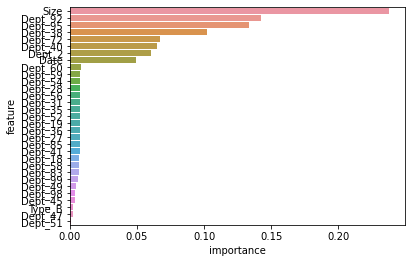

<Figure size 7200x2160 with 0 Axes>

In [281]:

indices = np.argsort(rf.feature_importances_)[::-1]
feature_rank = pd.DataFrame( columns = ['rank', 'feature', 'importance'] )
for f in range(scaled[var].shape[1]):
  feature_rank.loc[f] = [f+1,
                         scaled[var].columns[indices[f]],
                         rf.feature_importances_[indices[f]]]
sns.barplot( y = 'feature', x = 'importance', data = feature_rank )

plt.figure(figsize=(100,30))

In [284]:
test_final = pd.DataFrame({'Id':Id.id,'predicted': rf.predict(scaled_test[var])})

In [285]:
test_final.head(10)

,Id,predicted
0,1_1_2012-11-02,14217.803547
1,1_1_2012-11-09,14217.803547
2,1_1_2012-11-16,13226.392368
3,1_1_2012-11-23,18769.256589
4,1_1_2012-11-30,12256.794423
5,1_1_2012-12-07,15659.014218
6,1_1_2012-12-14,24523.559276
7,1_1_2012-12-21,14214.649505
8,1_1_2012-12-28,14074.737899
9,1_1_2013-01-04,12725.939182
